In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

乳腺癌检测       
思路：先采集肿瘤病灶 造影图片，然后对图片进行分析，从图片中提取特征，再根据特征来训练模型。最终使用模型来检测新采集到的肿瘤病灶 造影，以便判断肿瘤是良性的还是恶性的   
这里直接 scikit-learn 自带的乳腺癌数据集，这个数据集是已经采集后的数据

In [1]:
# 载入数据
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'DESCR': 'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 i

In [13]:
X = cancer.data
y = cancer.target
print('data shape: {0}; no. positive: {1}; no. negative: {2}'.format(
    X.shape, y[y==1].shape[0], y[y==0].shape[0])) #恶性的 malignant   y.shape 返回的一个元组，代表 y 数据集的信息,如（行，列） y.shape[0], 意思是返回 y 中行的总数 
print(cancer.data[0])  #打印一个样本数据  

data shape: (569, 30); no. positive: 357; no. negative: 212
[  1.79900000e+01   1.03800000e+01   1.22800000e+02   1.00100000e+03
   1.18400000e-01   2.77600000e-01   3.00100000e-01   1.47100000e-01
   2.41900000e-01   7.87100000e-02   1.09500000e+00   9.05300000e-01
   8.58900000e+00   1.53400000e+02   6.39900000e-03   4.90400000e-02
   5.37300000e-02   1.58700000e-02   3.00300000e-02   6.19300000e-03
   2.53800000e+01   1.73300000e+01   1.84600000e+02   2.01900000e+03
   1.62200000e-01   6.65600000e-01   7.11900000e-01   2.65400000e-01
   4.60100000e-01   1.18900000e-01]


数据集中总共有 569一个样本，每个样本有 30个特征， 357个阳性(y =1）样本, 212 个阴性 (y =0 ）样本       
   
数据集总共从病灶造影图片中提取以下10个关键属性    
• radius 半径即病灶中点离边界的平均距离    
• texture 纹理，灰度值的标准偏差      
• perimeter 周长即病灶的大       
• area 面积，也是反映病灶大小一个指标       
• smoothness 平滑度 ，即半径的变化幅度      
• actness  密实度，周长的平方除以面积的商再减1       
• concavity 凹度，凹陷部分轮廓的严重程度      
• concave points 凹点 ，凹陷轮廓的数量      
• symmetry 对称性      
• fractal dimension 分形维度      

In [17]:
cancer.feature_names
#X.shape[1] #提取第二个元素

30

In [18]:
#划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 高斯核函数

从数据集的大小可以看出，数据集很小，高斯核函数太复杂，容易造成过拟合，模型效果应该不会特别好，下面我们来证实下我们的猜测

In [20]:
from sklearn.svm import SVC

clf = SVC(C=1.0, kernel='rbf', gamma=0.1) #
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

train score: 1.0; test score: 0.6491228070175439


C 默认值为1:错误分类样本的惩罚因子，C越大，惩罚力度越大，倾向于选择复杂的模型，减少错分样本，C越小，惩罚力度越小，倾向于选择简答的模型   
kernel 默认选择径向基核函数’rbf ,也可选择’linear’,‘poly’,'sigmod’核函数  
gamma  核函数系数，只对‘rbf’,‘poly’,‘sigmod’有效, 默认是gamma = 1 / n_features ,n_features为样本原始特征数量
https://www.cnblogs.com/xiaotan-code/p/6700290.html    

   
训练数据集分数接近满分，而测试数据集的评分很低这是典型的过拟合现象   
当然，我们也可以自动来选择参数。决策树介绍过使用GridSearchCV来自动选择参数，我们看看如果使用高斯模型，最优的gamma参数值是多少，其对应的模型交叉验证评分是多少。 

best param: {'gamma': 0.00011379310344827585}
best score: 0.9367311072056239


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

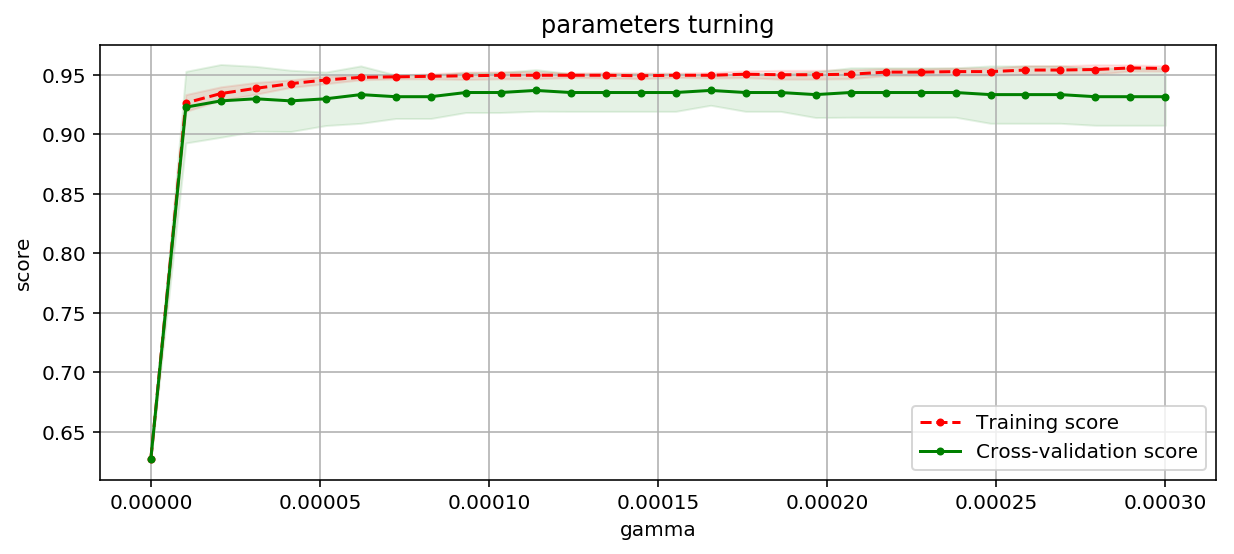

In [23]:
from common.utils import plot_param_curve
from sklearn.model_selection import GridSearchCV

gammas = np.linspace(0, 0.0003, 30)
param_grid = {'gamma': gammas}
clf = GridSearchCV(SVC(), param_grid, cv=5)
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_,
                                                clf.best_score_))

plt.figure(figsize=(10, 4), dpi=144)
plot_param_curve(plt, gammas, clf.cv_results_, xlabel='gamma')  #参数曲线


由此可见，即使是最好的gamma参数下，其平均最优得分也只是0.936731107206。我们选择在gamma为0.01时，画出学习曲线，更直观地观察模型拟合情况

elaspe: 3.373885


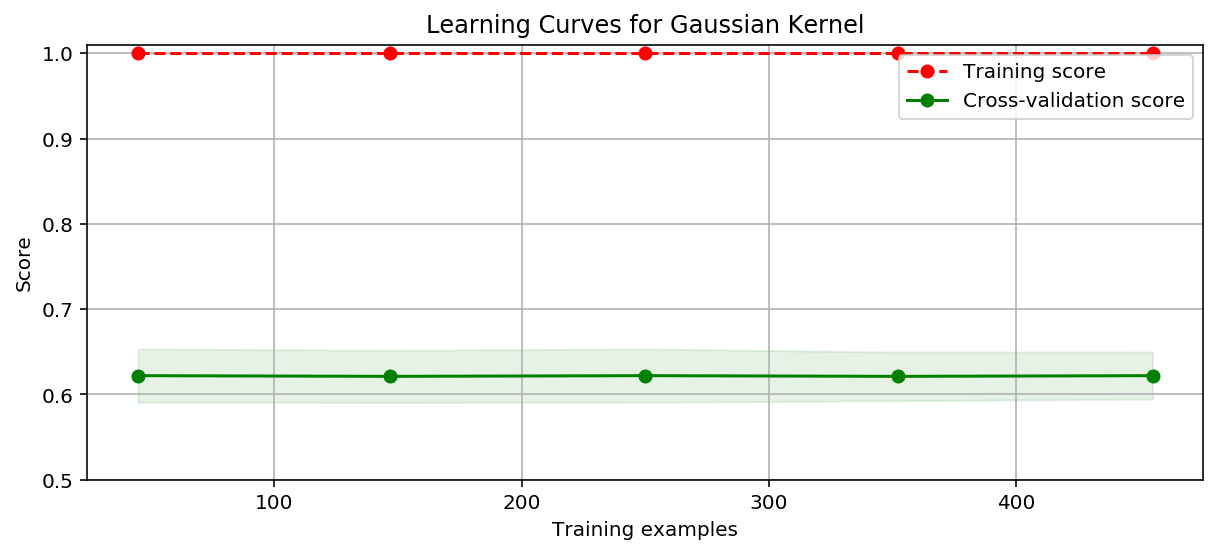

In [25]:
import time
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = 'Learning Curves for Gaussian Kernel'

start = time.clock()
plt.figure(figsize=(10, 4), dpi=144)
plot_learning_curve(plt, SVC(C=1.0, kernel='rbf', gamma=0.01),
                    title, X, y, ylim=(0.5, 1.01), cv=cv)

print('elaspe: {:.6f}'.format(time.clock()-start)) #耗时

从上图可以看出这是明显的过拟合现象，交叉验证数据集的评分非常低，且离训练数据集评分非常远，接下来换一个模型，使用二阶多项式核函数来拟合模型，看看结果如何

## 多项式核函数

In [28]:
from sklearn.svm import SVC

clf = SVC(C=1.0, kernel='poly', degree=2)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))
#degree:int型参数 默认为3，这个参数只对多项式核函数有用，是指多项式核函数的阶数n

train score: 0.9758241758241758; test score: 0.9385964912280702


看起来结果好多了，作为对比，画出一阶多项式和二阶多项式的学习曲线，观察模型的拟合情况。

elaspe: 264.633302


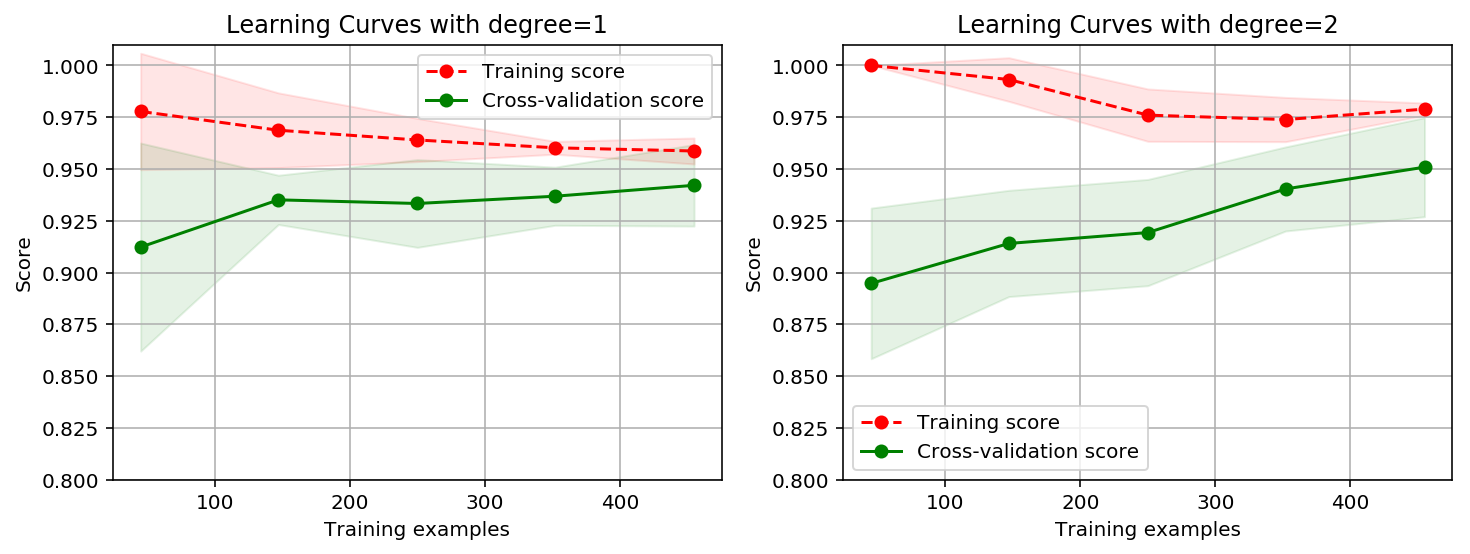

In [29]:
import time
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = 'Learning Curves with degree={0}'
degrees = [1, 2]

start = time.clock()
plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1) #len(degrees)为2
    plot_learning_curve(plt, SVC(C=1.0, kernel='poly', degree=degrees[i]),
                        title.format(degrees[i]), X, y, ylim=(0.8, 1.01), cv=cv, n_jobs=4) #n_jobs:用来设定CPU运行情况

print('elaspe: {0:.6f}'.format(time.clock()-start))

从图中可以看出，二阶多项式核函数的拟合效果更好。平均测试数据集评分可达0.950，最高时达到0.975。运行这段代码需要注意，二阶多项式核函数计算代价很高，在笔记本一般需要运行数分钟。